In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import torch
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import json
import os
import pickle
from pathlib import Path
import optuna
import wandb

os.environ["GCLOUD_PROJECT"] = "flowing-mantis-239216"

In [9]:
params = {
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.family": "serif",
    "font.sans-serif": [],
    "axes.labelsize": 11,
}
plt.rcParams.update(params)
rc("text", usetex=True)

CM = 1 / 2.54
# cmap = plt.cm.get_cmap("viridis")
cmap = mpl.colormaps.get_cmap("Blues")
# plt.style.use(['science','nature'])

# Bright color scheme
# color-blind safe
# from Paul Tot's website: https://personal.sron.nl/~pault/
# Set color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['4477AA', 'EE6677', '228833', 'CCBB44', '66CCEE', 'AA3377', 'BBBBBB'])


# Standard SciencePlots color cycle
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(
    "color", ["0C5DA5", "00B945", "FF9500", "FF2C00", "845B97", "474747", "9e9e9e"]
)


In [3]:
# results_df = pd.read_csv("../data/results/learning_curves_gbm_default_params.csv")
# train_sizes = results_df.start.abs().unique()
# train_acc_uni = results_df[results_df.strategy == "uniform"].train_acc
# val_acc_uni = results_df[results_df.strategy == "uniform"].val_acc

# train_acc_exp = results_df[results_df.strategy == "exponential"].train_acc
# val_acc_exp = results_df[results_df.strategy == "exponential"].val_acc


In [4]:
# # fig, axs = plt.subplot_mosaic("AB;CD", figsize=(10,10))

# fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12*CM, 6*CM), sharey=True, sharex=True, constrained_layout=True)

# ax1.plot(train_sizes, train_acc_uni, ".-", label="Train", color="C1")
# ax1.plot(train_sizes, val_acc_uni, ".-", label="Val", color="C0")


# ax2.plot(train_sizes, train_acc_exp, ".-", label="Train", color="C1")
# ax2.plot(train_sizes, val_acc_exp, ".-", label="Val", color="C0")

# # if not ax:
# #     ax=plt.gca()

# # ax.fill_between(
# #         train_sizes,
# #         train_acc + 0.02, # .mean(axis=1) - fit_times.std(axis=1),
# #         train_acc - 0.02, # fit_times.mean(axis=1) + fit_times.std(axis=1),
# #         alpha=0.3,
# #         color="C3",
# # )

# # ax.fill_between(
# #         train_sizes,
# #         val_acc + 0.02, # .mean(axis=1) - fit_times.std(axis=1),
# #         val_acc - 0.02, # fit_times.mean(axis=1) + fit_times.std(axis=1),
# #         alpha=0.3,
# # )

# # max
# xmax = train_sizes[np.argmax(val_acc_uni)]
# ymax = val_acc_uni.max()
# ax1.plot(xmax, ymax, ".", color="C3")
# ax1.text(xmax, ymax + 0.02, f"{ymax * 100 :.2f}\%",         horizontalalignment='center')
# #ax1.axvline(x=xmax, color="black", linestyle="--", linewidth=0.5)

# xmax = train_sizes[np.argmax(val_acc_exp)]
# ymax = val_acc_exp.max()
# ax2.plot(xmax, ymax, ".", color="C3")
# ax2.text(xmax, ymax + 0.02, f"{ymax * 100 :.2f}\%",         horizontalalignment='center')
# #ax2.axvline(x=xmax, color="black", linestyle="--", linewidth=0.5)

# ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
# ax2.xaxis.set_major_formatter(ticker.EngFormatter())
# # title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
# # plt.title(title, fontsize = 18, y = 1.03)
# ax1.legend(loc="lower right", frameon=False)
# ax2.legend(loc="lower right", frameon=False)
# plt.ylim(0.6, 1)
# # plt.show()

# ax1.set_title('(a) Uniform Weights')
# ax2.set_title('(b) Exponential Weights')
# # plt.tight_layout()
# # plt.ylabel("Accuracy")  # , fontsize = "small")
# # plt.xlabel("Number of Training Samples")  # , fontsize = "small")

# fig.supylabel('Accuracy')
# fig.supxlabel('Number of Training Samples')

# plt.savefig(
#     f"../reports/Graphs/learning-curves-gradient-boosting.pdf",
#     bbox_inches="tight",
# )


In [5]:
# feature_importance_adv_val = pd.read_csv("../data/results/feature_importance_gbm_classical_size.csv")
# # feature_importance_adv_val.set_index("Feature Id", drop=True, inplace=True)
# # feature_importance_adv_val.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
# feature_importance_adv_val["Feature Id"] = feature_importance_adv_val["Feature Id"].str.lower()

In [7]:
# # feature_importance_adv_val.plot.bar(figsize=(12 * CM, 6 * CM))
# ax = feature_importance_adv_val.plot.bar(x='Feature Id', y='Importances', figsize=(12 * CM, 6 * CM))
# ax.set_ylabel("Feature Importance in \%")
# ax.set_xlabel("Feature")
# # ax.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))
# plt.legend(frameon=False)
# plt.savefig(
#     f"../reports/Graphs/adv-val-gradient-boosting.pdf",
#     bbox_inches="tight",
# )

In [3]:
def to_mpl(start: str, end: str):
    mpl_start = mdates.date2num(pd.to_datetime(start))
    mpl_end = mdates.date2num(pd.to_datetime(end))
    return mpl_start, mpl_end - mpl_start


In [4]:
def to_pos(span: tuple):
    return span[0] + 0.5 * span[1]


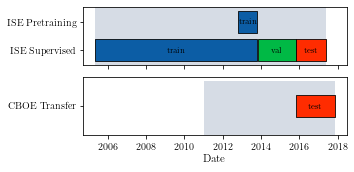

In [17]:
fig, (ax, bx) = plt.subplots(
    2, 1, sharey="none", sharex="col", figsize=(12 * CM, 6 * CM)
)

# ise
ax.broken_barh([to_mpl("2005-05-02", "2017-05-31")], (1, 5), facecolors="#D6DCE5")

# ise pretraining
span = [to_mpl("2012-10-23", "2013-10-24")]
ax.broken_barh(span, (2.5, 1), facecolors="C0", edgecolor="black", linewidth=0.8)

ax.text(
    x=to_pos(span[0]),
    y=3,
    s="train",
    ha="center",
    va="center",
    color="black",
    fontsize="small",
)

spans = [
    to_mpl("2005-05-02", "2013-10-24"),
    to_mpl("2013-10-25", "2015-11-05"),
    to_mpl("2015-11-06", "2017-05-31"),
]

# ise supervised
ax.broken_barh(
    spans,
    (1.2, 1),
    facecolors=("C0", "C1", "C3"),
    edgecolor="black",
    linewidth=0.8,
)

# add text labels manually
labels = ["train", "val", "test"]
for i, s in enumerate(spans):
    ax.text(
        x=to_pos(s),
        y=1.7,
        s=labels[i],
        ha="center",
        va="center",
        color="black",
        fontsize="small",
    )

ax.xaxis_date()
plt.setp(ax.get_xticklabels(), visible=True)

# cboe
bx.broken_barh([to_mpl("2011-01-01", "2017-10-31")], (1, 2.5), facecolors="#D6DCE5")

spans = [
    to_mpl("2015-11-06", "2017-10-31"),
]

# cboe supervised
bx.broken_barh(
    spans,
    (1.85, 1),
    facecolors=("C3"),
    edgecolor="black",
    linewidth=0.8,
)

# add text labels manually
labels = ["test"]
for i, s in enumerate(spans):
    bx.text(
        x=to_pos(s),
        y=2.35,
        s=labels[i],
        ha="center",
        va="center",
        color="black",
        fontsize="small",
    )



# Modify y-axis tick labels
ax.set_yticks([1.7, 3], labels=["ISE Supervised", "ISE Pretraining"])
bx.set_yticks([2.35], labels=["CBOE Transfer"])

ax.set_ylim(1, 3.7)
bx.set_ylim(1, 3.7)

# into to date
bx.xaxis_date()

plt.xlabel("Date")

# plt.show()
plt.savefig("../reports/Graphs/train-test-split.pdf", bbox_inches="tight")


In [11]:
print(plt.rcParams["axes.linewidth"])


0.8


In [18]:
# code from https://d2l.ai/d2l-en.pdf
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap=cmap):
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = plt.subplots(
        num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False
    )
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes)
    plt.savefig("../reports/Graphs/attention-maps.pdf", bbox_inches="tight")


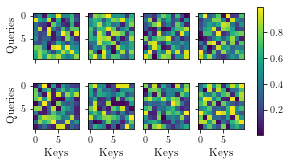

In [19]:
# attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
attention_weights = torch.rand(size=(2, 4, 10, 10))
show_heatmaps(
    attention_weights, xlabel="Keys", ylabel="Queries", figsize=(12 * CM, 6 * CM)
)


In [20]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return pos_encoding


(1, 64, 96)


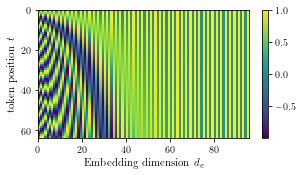

In [21]:
tokens = 64
dimensions = 96


pos_encoding = positional_encoding(tokens, dimensions)
print(pos_encoding.shape)

plt.figure(figsize=(12 * CM, 6 * CM))
plt.pcolormesh(pos_encoding[0], cmap=cmap)
plt.xlabel("Embedding dimension $d_e$")
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel("token position $t$")
plt.colorbar()
plt.savefig("../reports/Graphs/positional-encoding.pdf", bbox_inches="tight")


## Gradient Boosting

In [49]:
# set study globally here
study = "30sl6vqf.optuna:v49"
model = "30sl6vqf_CatBoostClassifier_default.cbm:v5"

In [50]:
# see https://wandb.ai/fbv/thesis/runs/kwlaw02g/overview?workspace=user-karelze
run = wandb.init(project="thesis", entity="fbv")



# model_name = model.split("/")[-1].split(":")[0]
study_id = model_name.split("_")[0]

artifact = run.use_artifact(study)
study_dir = artifact.download()

artifact = run.use_artifact(model)
model_dir = artifact.download()

study_name, version = study.split(":")

wandb:   1 of 1 files downloaded.  
wandb:   2 of 2 files downloaded.  


In [51]:
file  = open(f"./artifacts/{study_id}.optuna:{version}/{study_id}.optuna",'rb')
study = pickle.load(file)

sampler = study.sampler
storage = f"sqlite:///../{study_id}.db"

study = optuna.load_study(study_id, storage=storage,sampler=sampler)

/scratch/slurm_tmpdir/job_21970988/ipykernel_834898/1646125407.py:7: FutureWarning: load_study(): Please give all values as keyword arguments. See https://github.com/optuna/optuna/issues/3324 for details.
  study = optuna.load_study(study_id, storage=storage,sampler=sampler)


/scratch/slurm_tmpdir/job_21970988/ipykernel_834898/1030151261.py:7: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
/scratch/slurm_tmpdir/job_21970988/ipykernel_834898/1030151261.py:8: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  param_importances = optuna.visualization.matplotlib.plot_param_importances(study);
/scratch/slurm_tmpdir/job_21970988/ipykernel_834898/1030151261.py:9: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  slices = optuna.visualization.matplotlib.plot_slice(study);
/scratch/slurm_tmpdir/job_21970988/ipykernel_834898/1030151261.py:10: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  contours = optuna.visualiz

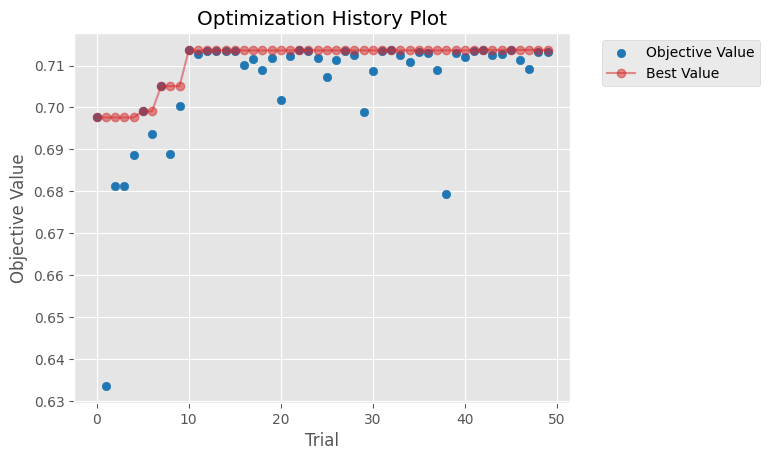

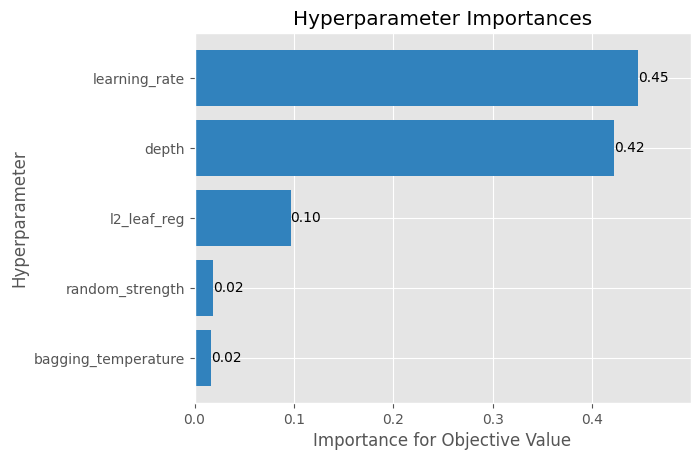

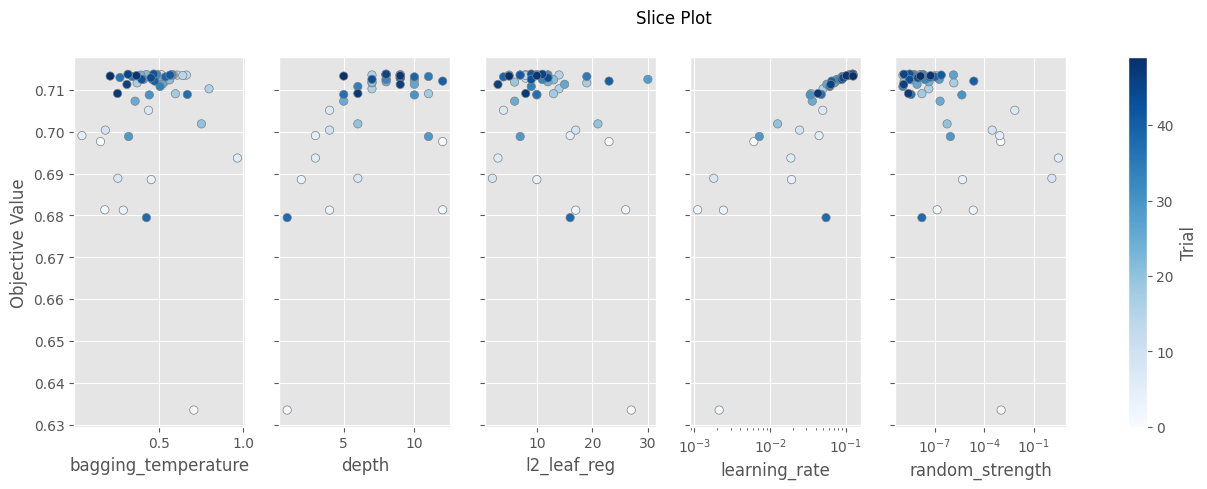

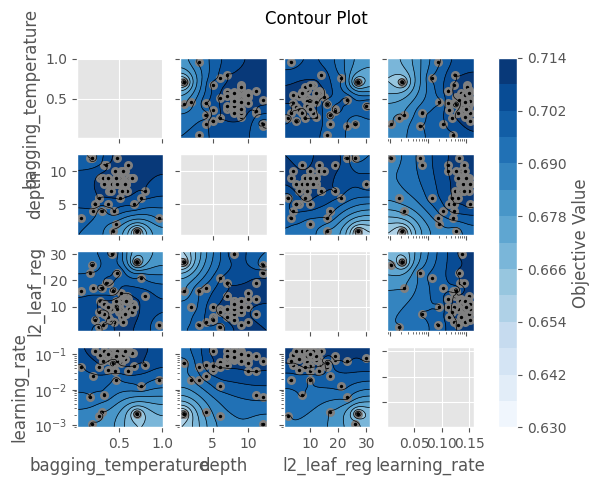

In [183]:
# print(f"artifacts/{study_id}.optuna:{version}/{study_id}.optuna")
# version = "v49"
# file  = open(f"./artifacts/{study_id}.optuna:{version}/{study_id}.optuna",'rb')
# study = pickle.load(file)
# print(study.trials)

optuna.visualization.matplotlib.plot_optimization_history(study)
param_importances = optuna.visualization.matplotlib.plot_param_importances(study);
slices = optuna.visualization.matplotlib.plot_slice(study);
contours = optuna.visualization.matplotlib.plot_contour(
     study, ["learning_rate", "depth", "bagging_temperature", "l2_leaf_reg"]
);

In [130]:
params = {
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.family": "serif",
    "font.sans-serif": [],
    "axes.labelsize": 11,
}
plt.rcParams.update(params)
rc("text", usetex=True)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

CM = 1 / 2.54
# cmap = plt.cm.get_cmap("viridis")
cmap = mpl.colormaps.get_cmap("Blues")
# plt.style.use(['science','nature'])

# Bright color scheme
# color-blind safe
# from Paul Tot's website: https://personal.sron.nl/~pault/
# Set color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['4477AA', 'EE6677', '228833', 'CCBB44', '66CCEE', 'AA3377', 'BBBBBB'])


# Standard SciencePlots color cycle
mpl.rcParams["axes.prop_cycle"] = mpl.cycler(
    "color", ["0C5DA5", "00B945", "FF9500", "FF2C00", "845B97", "474747", "9e9e9e"]
)


plt.style.use('default')

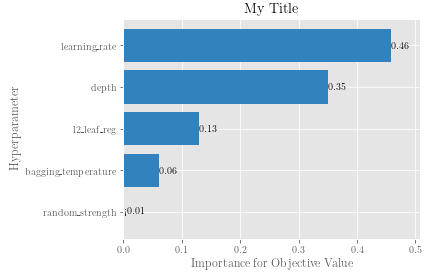

In [56]:
ax = param_importances

# https://stackoverflow.com/a/46906599/5755604
ax.remove()
fig2 = plt.figure()
ax.figure=fig2
fig2.axes.append(ax)
fig2.add_axes(ax)

plt.title("My Title")
plt.tight_layout()

plt.show()

In [111]:
LUT_LABELS = {"Objective Value": "Accuracy", "bagging_temperature": "Bagging Temp.", "depth":"Depth", "l2_leaf_reg": "$\ell_2$ Leaf Reg." , "learning_rate" : "$\lambda$", "random_strength": "Random Strength", "":""}

findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 


bagging_temperature
depth
l2_leaf_reg
learning_rate
random_strength


findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 
findfont: Generic family 'sans-serif' not found because none of the following families were found: 


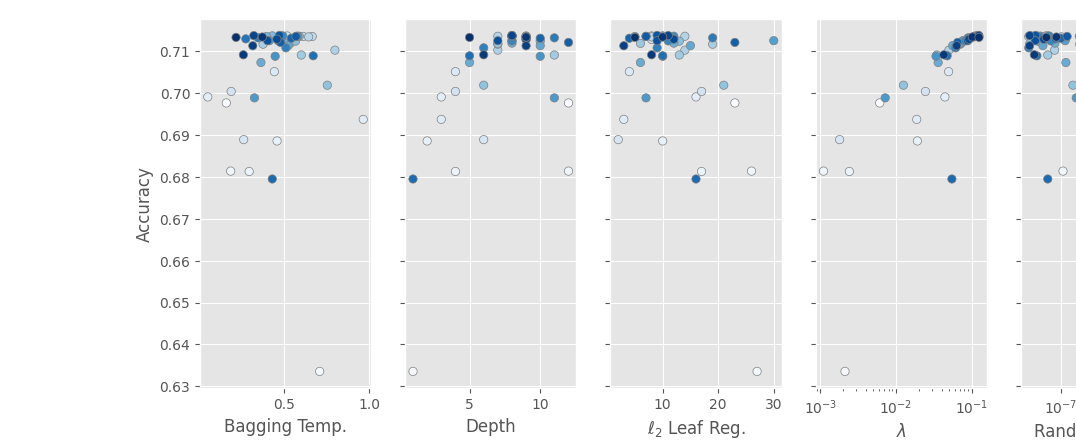

In [177]:
# https://stackoverflow.com/a/46906599/5755604
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


ax = slices
plt.style.use('default')
params = {
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.family": "serif",
    "font.sans-serif": [],
    "axes.labelsize": 11,
}
plt.rcParams.update(params)
rc("text", usetex=True)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

fig2 = plt.figure(figsize=(12 * CM, 6 * CM))

for i, a in enumerate(ax.flat, start=1):
    a.remove()
    a.figure = fig2
    
    label = a.get_xlabel()
    print(label)
    a.set_xlabel(LUT_LABELS[label])
    label = a.get_ylabel()
    a.set_ylabel(LUT_LABELS[label])  

    fig2.axes.append(a)
    fig2.add_axes(a)

plt.savefig(f"../reports/Graphs/{study_id}.pdf", bbox_inches="tight")
plt.show()

In [184]:
# convert axis array to figure
import matplotlib as mpl
rc("text", usetex=True)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# mpl.rcParams.update(mpl.rcParamsDefault)

# https://stackoverflow.com/a/46906599/5755604
ax = contours

fig2 = plt.figure(figsize=(14*CM,16*CM))

for i, a in enumerate(ax.flat, start=1):
    a.remove()
    a.figure = fig2
    label = a.get_xlabel()
    print(label)
    a.set_xlabel(LUT_LABELS[label])
    label = a.get_ylabel()
    a.set_ylabel(LUT_LABELS[label])  
    # a.set_cmap(cmap)
    fig2.axes.append(a)
    fig2.add_axes(a)
plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0.1)
plt.savefig(f"../reports/Graphs/{study_id}-search-space.pdf", bbox_inches = 'tight', pad_inches=0.2,dpi=fig2.dpi)
plt.close()













bagging_temperature
depth
l2_leaf_reg
learning_rate


In [61]:
# visualize learning curves
with open(Path(model_dir,model_name[:-4]+"_training.json"), 'r') as j:
     contents = json.loads(j.read())
    
# extract relevant keys
iterations = contents.get("iterations")
test_metrics = [d['name'] for d in contents['meta']['test_metrics'] ]
test_results = [d['test'] for d in iterations]
learn_metrics = [d['name'] for d in contents['meta']['learn_metrics'] ]
learn_results = [d['learn'] for d in iterations]

metrics_learn = pd.DataFrame(learn_results, columns=learn_metrics).add_prefix("learn_")
metrics_test = pd.DataFrame(test_results, columns=test_metrics).add_prefix("test_")

learning_metrics = pd.concat([metrics_learn, metrics_test], axis=1)

<AxesSubplot:>

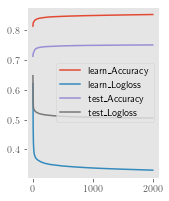

In [50]:
learning_metrics.plot(kind="line", figsize=(6*CM,8*CM), grid=False)